In [ ]:
# this cell basically imports all the important libraries and stuff
#importing the neccesary libraries
from math import sqrt,log2
import numpy as np
import random
import collections   
from sortedcontainers import SortedDict


In [ ]:
# basically initialises the no of users and servers
NO_OF_USERS = 100
NO_OF_BROADCAST_SERVERS = 10
BW = 10 #bandwidth 
alpha = 2.5# txf
NOISE = 0.0005


In [ ]:
# both classes defined, might need to twerk the definitions a bit
class User:
    def __init__(self,uID,loc):
        self.preference_list =[]
        self.uID = uID
        self.X = loc[0]
        self.Y = loc[1]
        self.target = None
class BS :
    def __init__(self,bID,loc):
        self.preference_list = []
        self.bID = bID
        self.X = loc[0]
        self.Y = loc[1]
        self.associatedUsers = set()  #use update to add elements to set else use add for element


In [ ]:
#this generates 110 x and y co ordinates and hence the first 100 will be taken as users
# the next 10 as routers

random.seed(1)
x_coord = random.sample(range(1,500),110)
random.seed(2)
y_coord = random.sample(range(1,500),110)

Users = [User(i,(x_coord[i],y_coord[i])) for i in range(100)]
BSs = [BS(i-99,(x_coord[i],y_coord[i])) for i in range(100,110)]

# the BS id s needed to be twerked around a bit
# BSs = [BS(i+100,(x_coord[i],y_coord[i])) for i in range(100,110)]


#print(x_coord,"\n",y_coord)

In [ ]:
# this is the distance matrix which has the distance between any random user and router
# the routers are being referred to as BS

distance_Mat =[sqrt((Users[j].X -BSs[i].X )**2 + (Users[j].Y -BSs[i].Y )**2) for i in range(0,10) for j in range (0,100)]
distance_Mat = (np.array(distance_Mat)).reshape(10,100)


In [ ]:
def preflistBuilderforUsers(n:int):   #n is no of users  in BS
    rx = alpha/(distance_Mat**2)
    interactions= np.zeros((10,100))
    for i in range(10):
        for j in range(100):
            interactions[i][j] = np.sum([rx[p][j]for p in range(10) if p!=i])
       
    for j in range(100):
        pref_dict =SortedDict()
        pref_list =[] 
        for i in range(10):
            a = (BW/n)*log2(1+ (rx[i][j]/(NOISE + interactions[i][j])))
            pref_dict[a]=i+1+100
            
        for key,value in pref_dict.items():
            pref_list.append(value)
        pref_list.reverse()
        Users[j].preference_list = pref_list

In [ ]:

def preflistBuilderforBS():
    for i in range(10):
        pref_dict =  SortedDict()              #collections.OrderedDict()
        pref_list =[] 
        for j in range(100):
            a = distance_Mat[i][j]
            pref_dict[a] = j+1
        for key,value in pref_dict.items():
            pref_list.append(value)
        BSs[i].preference_list = pref_list
        

In [ ]:
import random
# n1=25
# n2=5
# r=5

n1=100
n2 = 10
r = 10
list1=[]
list2=[]

preflistBuilderforUsers(r)
preflistBuilderforBS()

for i in range(n1):
  list1.append(Users[i].preference_list)
for i in range(n2):
  list2.append(BSs[i].preference_list)
random.seed(1)
# for i in range(n1):
#   list1.append(random.sample(range(101,101+n2),n2))
# for i in range(n2):
#   list2.append(random.sample(range(1,1+n1),n1))



router_start=101
user_start=1

print(list1)
print(list2)



[[105, 108, 104, 109, 101, 102, 110, 106, 107, 103], [108, 104, 102, 105, 101, 109, 107, 103, 110, 106], [104, 108, 102, 107, 105, 101, 109, 103, 110, 106], [104, 108, 102, 107, 101, 105, 109, 103, 110, 106], [103, 101, 109, 107, 102, 106, 110, 105, 104, 108], [106, 110, 109, 103, 101, 105, 102, 107, 108, 104], [106, 110, 103, 109, 101, 105, 102, 107, 108, 104], [110, 106, 109, 105, 101, 103, 102, 108, 107, 104], [105, 108, 104, 102, 101, 109, 107, 103, 110, 106], [103, 101, 109, 107, 102, 105, 110, 106, 104, 108], [105, 109, 102, 101, 108, 104, 107, 110, 103, 106], [105, 108, 102, 104, 101, 109, 107, 110, 103, 106], [102, 101, 107, 109, 108, 104, 105, 103, 110, 106], [105, 108, 104, 102, 109, 101, 107, 110, 103, 106], [103, 101, 107, 109, 102, 105, 104, 108, 110, 106], [110, 106, 109, 101, 103, 105, 102, 107, 108, 104], [105, 110, 109, 106, 101, 102, 108, 103, 104, 107], [103, 109, 101, 110, 106, 102, 105, 107, 108, 104], [105, 108, 110, 109, 101, 104, 102, 106, 107, 103], [103, 101, 

In [ ]:
user_free=[True for i in range(n1)]
free_count=n1
satisfaction_rate=[0 for i in range(n1)]

bitrate_calculator=[-1 for i in range(n1)]

In [ ]:
def stable_2(list1,list2,server_patner,itrNo):
  

  server_free=[True for i in range(n2)]
  
  
  for j in range((int)(n1/n2)):
    for user__ in range(n1):
      i=0
      while (i < n2 and user_free[user__]):
        server=list1[user__][i]
        server_index=server-router_start

        if (server_free[server_index]==True):
          server_patner[server_index].append(user__+user_start)
          user_free[user__]=False
          server_free[server_index]=False
          satisfaction_rate[user__]=(itrNo)*10+list1[user__].index(server)
          break
          #free_count-=1
        else:
          s=len(server_patner[server_index])
          curr_patner=server_patner[server_index][s-1]

          index_curr=list2[server_index].index(curr_patner)
          index_user=list2[server_index].index(user__+user_start)

          if (index_user < index_curr):
            server_patner[server_index][s-1]=user__+user_start
            user_free[user__]=False
            user_free[curr_patner-user_start]=True
            satisfaction_rate[user__]=(itrNo)*10+list1[user__].index(server)
            break

        i+=1
    


      
  


In [ ]:
def stable_marriage(list1,list2,ratio):
  server_patner=[]
  for i in range(n2):
    server_patner.append([])

  for i in range(ratio):
    stable_2(list1,list2,server_patner,i+1)  
  return server_patner



    



In [ ]:
server_patner=stable_marriage(list1,list2,r)
server_patner

[[68, 87, 34, 41, 83, 60, 54, 18, 94, 27],
 [13, 79, 28, 72, 98, 46, 26, 30, 71, 38],
 [49, 76, 10, 73, 15, 51, 56, 31, 5, 20],
 [4, 67, 3, 36, 62, 53, 90, 58, 59, 1],
 [22, 97, 77, 11, 80, 96, 82, 14, 61, 75],
 [6, 47, 84, 39, 7, 52, 74, 23, 17, 19],
 [21, 25, 32, 81, 65, 44, 78, 95, 50, 55],
 [2, 91, 69, 89, 9, 12, 29, 45, 37, 99],
 [88, 93, 24, 66, 48, 100, 42, 85, 63, 70],
 [35, 8, 40, 16, 43, 86, 33, 64, 57, 92]]

In [ ]:
print(satisfaction_rate)

[102, 10, 30, 10, 90, 10, 50, 20, 51, 30, 40, 61, 10, 80, 50, 40, 93, 82, 107, 100, 10, 10, 82, 31, 21, 74, 103, 30, 71, 85, 80, 30, 70, 30, 10, 40, 91, 105, 40, 30, 40, 70, 50, 60, 81, 60, 20, 50, 10, 91, 60, 60, 60, 71, 101, 70, 91, 82, 92, 60, 90, 50, 91, 81, 50, 40, 20, 10, 31, 102, 95, 40, 40, 73, 100, 20, 30, 70, 20, 50, 40, 70, 50, 31, 80, 60, 20, 10, 40, 72, 20, 101, 20, 93, 81, 60, 20, 50, 101, 60]


In [ ]:
# final_answer_dict={}
# for i in range(n1):
#   final_answer_dict[i+user_start]=[]
# for i in range(n1):
#   final_answer_dict[i+user_start].append(bitrate_calculator[i])
#   final_answer_dict[i+user_start].append(satisfaction_rate[i])
#   temp=index_2d(server_patner,i+user_start)
#   final_answer_dict[i+user_start].append(temp+router_start)



In [ ]:
# from prettytable import PrettyTable as pt
# t=pt(['User_ID','Bitrate_Received_For_Marrying','Satisafcation_Rate','Band-width_Server']) 
# for i in range(n1):
#   list_temp=[]
#   list_temp.append(i+user_start)
#   list_temp.append(final_answer_dict[i+user_start][0])
#   list_temp.append(final_answer_dict[i+user_start][1])
#   list_temp.append(final_answer_dict[i+user_start][2])
#   t.add_row(list_temp)
#   list_temp.clear()

# print(t)

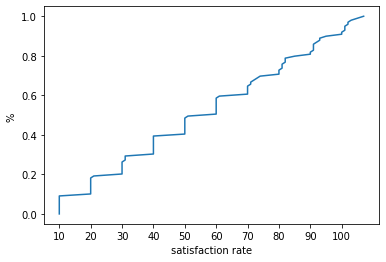

In [ ]:
#"https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python"
import matplotlib.pyplot as plt
import numpy as np
data_sorted = np.sort(satisfaction_rate)


#p = 1. * np.arange(len(data_sorted)) / (len(data_sorted) - 1)
p=np.linspace(0, 1, len(data_sorted))
# plot the sorted data:
fig = plt.figure()
plt.plot(data_sorted, p)
plt.xticks(np.arange(min(data_sorted), max(data_sorted)+1, 10))
plt.xlabel('satisfaction rate')
plt.ylabel('% ')
plt.show()
# ax1 = fig.add_subplot(121)
# ax1.plot(p, data_sorted)


#ax2 = fig.add_subplot(121)

# ax2.set_xlabel('')
# ax2.set_ylabel('')